In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Preparing the data

In [ ]:
x = np.linspace(0, 10*np.pi, num=1000)
e = np.random.normal(scale=10.0, size=x.size)
y = 65.0 + 1.8*x + 40*np.cos(x) + e 

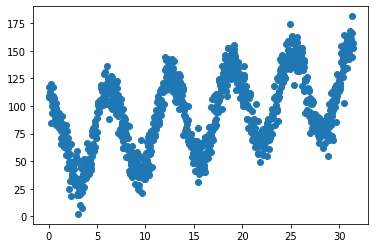

In [ ]:
plt.scatter(x, y);

# PyTorch gradient calculation example

Useful docs from the official documentation:

https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

https://pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html

https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html

In [ ]:
import torch

In [ ]:
xt = torch.tensor(x)
yt = torch.tensor(y)
learning_rate = 1e-2

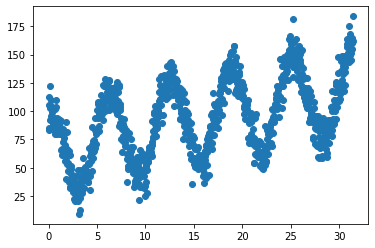

In [ ]:
plt.scatter(xt, yt);

In [ ]:
## A simple linear regression model
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)
def model(x):
    return w * x + b

## Compute prediction error
def loss_fn(prediction, y):
    return ((prediction-y)**2).mean()

prediction = model(xt)
loss = loss_fn(prediction, yt)

## Backpropagation
loss.backward()
with torch.no_grad():
    w -= w.grad * learning_rate 
    b -= b.grad * learning_rate 
    # Set the gradients to zero
    w.grad.zero_()
    b.grad.zero_()


In [ ]:
w, b

(tensor(26.3388, requires_grad=True), tensor(2.5344, requires_grad=True))

# TensorFlow gradient calculation example

Useful docs from the official documentation:

https://www.tensorflow.org/guide/basic_training_loops

https://www.tensorflow.org/guide/autodiff

https://www.tensorflow.org/api_docs/python/tf/Variable

https://www.tensorflow.org/api_docs/python/tf/Tensor

In [ ]:
import tensorflow as tf

In [ ]:
xt = tf.constant(x, dtype=tf.float32)
yt = tf.constant(y, dtype=tf.float32)
learning_rate = 1e-2

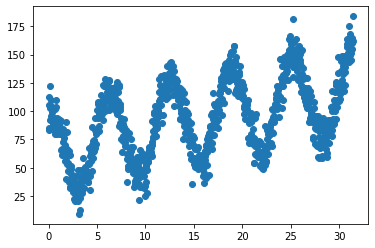

In [ ]:
plt.scatter(xt, yt);

In [ ]:
## A simple linear regression model
w = tf.Variable(1.0, trainable=True)
b = tf.Variable(1.0, trainable=True)
def model(x):
    return w * x + b

## Compute prediction error
def loss_fn(prediction, y):
    return tf.reduce_mean(tf.square(prediction-y))

with tf.GradientTape() as tape:
    prediction = model(xt)
    loss = loss_fn(prediction, yt)

## Backpropagation
dw, db = tape.gradient(loss, [w, b])
w.assign_sub(learning_rate * dw)
b.assign_sub(learning_rate * db);

In [ ]:
w, b

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=26.33882>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.5343952>)

# JAX gradient calculation example

Useful docs from the official documentation:

https://jax.readthedocs.io/en/latest/jax-101/01-jax-basics.html

https://jax.readthedocs.io/en/latest/jax-101/04-advanced-autodiff.html

In [ ]:
import jax
import jax.numpy as jnp

In [ ]:
xt = jnp.array(x)
yt = jnp.array(y)
learning_rate = 1e-2

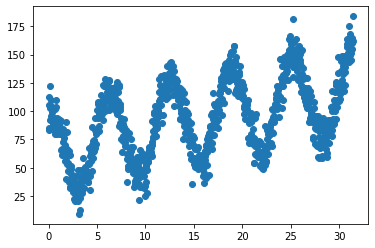

In [ ]:
plt.scatter(x, y);

In [ ]:
# A simple linear regression model
model_parameters = jnp.array([1., 1.])
def model(theta, x):
    w, b = theta
    return w * x + b

# Function to compute prediction error
def loss_fn(model_parameters, x, y):
    prediction = model(model_parameters, x)
    return jnp.mean((prediction-y)**2)

# Backpropagation
grads_fn = jax.grad(loss_fn)
grads = grads_fn(model_parameters, xt, yt)
model_parameters -= learning_rate * grads

In [ ]:
model_parameters

DeviceArray([26.338818 ,  2.5343952], dtype=float32)